In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#num_buttons = 4
#ra = 1
ra_list = [1,1,1,1,0.75]
rb = 100

num_buttons = len(ra_list)-1

num_ladder_r = num_buttons +1

In [3]:
# generate a list of all combinations of one or two button presses

combinations = []

for i in range(0,2**num_buttons):
  myvec = np.zeros(num_buttons)
  for j in range(0,num_buttons):
    k = (i & 1<<j)>>j
    myvec[j] = k
    
  if(myvec.sum() <= 2):
    combinations += [myvec.tolist()]

combinations

[[0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 1.0, 0.0],
 [0.0, 1.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 1.0],
 [0.0, 1.0, 0.0, 1.0],
 [0.0, 0.0, 1.0, 1.0]]

In [4]:
fractions = []
buttons_pressed = []
combination_number = []
bit_codes = []

counter = 0
for state in combinations:
    
  npra = np.array(ra_list)    

  r_ladder_down = npra.sum()
  r_ladder_up   = npra.sum()

  this_bit_code = 0
    
  for j in range(0,num_buttons):
    k = state[j]
    if (k>0): ## switch j is closed
      this_bit_code += 1<<j
      r_ladder_down_ = npra[0:(j+1)].sum()
      r_ladder_down = np.min([r_ladder_down,r_ladder_down_])
      r_ladder_up_ = npra[(j+1):len(npra)].sum()
      r_ladder_up = np.min([r_ladder_up,r_ladder_up_])
        
        
        
  r_up = r_ladder_up
  # parallel of ladder down and output parallel resistor
  r_down = 1./(1./r_ladder_down + 1./rb)

  voltage_fraction = r_down/(r_up + r_down)
  # special case: no button press
  if (np.array(state).sum() ==0):
    voltage_fraction = 0
  
  print("state: ",end="")
  print(state)
#  print("r_ladder_up:")
#  print(r_ladder_up)
#  print("r_ladder_down:")
#  print(r_ladder_down)
  print("voltage fraction")
  print(voltage_fraction)
  fractions += [voltage_fraction]
  buttons_pressed += [np.array(state).sum()]
  combination_number += [counter]
  bit_codes += [this_bit_code]
  counter += 1


fractions_sorted = fractions.copy()
fractions_sorted.sort()

state: [0.0, 0.0, 0.0, 0.0]
voltage fraction
0
state: [1.0, 0.0, 0.0, 0.0]
voltage fraction
0.208877284595
state: [0.0, 1.0, 0.0, 0.0]
voltage fraction
0.416233090531
state: [1.0, 1.0, 0.0, 0.0]
voltage fraction
0.264725347452
state: [0.0, 0.0, 1.0, 0.0]
voltage fraction
0.624674648621
state: [1.0, 0.0, 1.0, 0.0]
voltage fraction
0.361336946703
state: [0.0, 1.0, 1.0, 0.0]
voltage fraction
0.528401585205
state: [0.0, 0.0, 0.0, 1.0]
voltage fraction
0.836820083682
state: [1.0, 0.0, 0.0, 1.0]
voltage fraction
0.568990042674
state: [0.0, 1.0, 0.0, 1.0]
voltage fraction
0.723327305606
state: [0.0, 0.0, 1.0, 1.0]
voltage fraction
0.795228628231


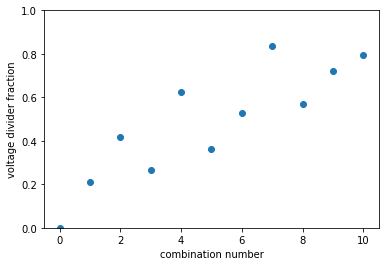

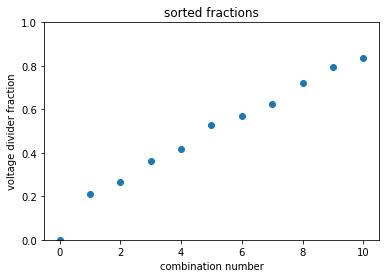

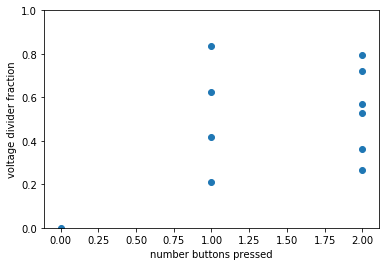

In [5]:
plt.scatter(combination_number,fractions)
plt.xlabel("combination number")
plt.ylabel("voltage divider fraction")
plt.ylim(0,1)
plt.show()

plt.scatter(combination_number,fractions_sorted)
plt.xlabel("combination number")
plt.ylabel("voltage divider fraction")
plt.ylim(0,1)
plt.title("sorted fractions")
plt.show()

plt.scatter(buttons_pressed,fractions)
plt.xlabel("number buttons pressed")
plt.ylabel("voltage divider fraction")
plt.ylim(0,1)
plt.show()

In [6]:
dnl = []
for i in range(1,len(fractions_sorted)):
  dnl += [fractions_sorted[i]-fractions_sorted[i-1]]


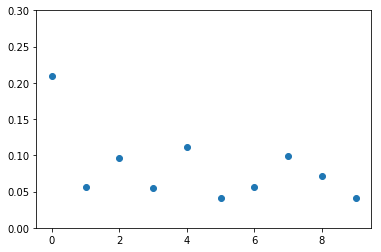

smallest distance
0.0405884574695


In [7]:
plt.scatter(range(0,len(dnl)),dnl)
plt.ylim(0,0.3)
plt.show()

min_dnl = np.min(dnl)

print("smallest distance")
print(min_dnl)

In [8]:
for i in range(0,len(bit_codes)):
  fraction  = fractions[i]
  bit_code  = bit_codes[i]
  print("ADC: {:04d}, bit code: {:05b}".format(int(fraction*1023),bit_code))

ADC: 0000, bit code: 00000
ADC: 0213, bit code: 00001
ADC: 0425, bit code: 00010
ADC: 0270, bit code: 00011
ADC: 0639, bit code: 00100
ADC: 0369, bit code: 00101
ADC: 0540, bit code: 00110
ADC: 0856, bit code: 01000
ADC: 0582, bit code: 01001
ADC: 0739, bit code: 01010
ADC: 0813, bit code: 01100


In [9]:
# with error margins

for i in range(0,len(bit_codes)):
  fraction  = fractions[i]
  bit_code  = bit_codes[i]
  adc_lo = np.max([int((fraction-min_dnl/2)*1023)+1,0])
  adc_hi = np.min([int((fraction+min_dnl/2)*1023)-1,1023])
  print("ADC: {:04d}-{:04d}, bit code: {:04b}".format(adc_lo,adc_hi,bit_code))

ADC: 0000-0019, bit code: 0000
ADC: 0193-0233, bit code: 0001
ADC: 0406-0445, bit code: 0010
ADC: 0251-0290, bit code: 0011
ADC: 0619-0658, bit code: 0100
ADC: 0349-0389, bit code: 0101
ADC: 0520-0560, bit code: 0110
ADC: 0836-0875, bit code: 1000
ADC: 0562-0601, bit code: 1001
ADC: 0720-0759, bit code: 1010
ADC: 0793-0833, bit code: 1100


In [13]:
# with error margins, sorted

#create a dictionary
bit_codes_dict = {}
for i in range(0,len(bit_codes)):
  fraction  = fractions[i]
  bit_code  = bit_codes[i]
  bit_codes_dict[fraction] = bit_code
    

for i in range(0,len(fractions_sorted)):
  fraction  = fractions_sorted[i]
  bit_code  = bit_codes_dict[fraction]
  adc_lo = np.max([int((fraction-min_dnl/2)*1023)+1,0])
  adc_hi = np.min([int((fraction+min_dnl/2)*1023)-1,1023])
  print("ADC: {:04d}-{:04d}, bit code: {:04b}".format(adc_lo,adc_hi,bit_code))

ADC: 0000-0019, bit code: 0000
ADC: 0193-0233, bit code: 0001
ADC: 0251-0290, bit code: 0011
ADC: 0349-0389, bit code: 0101
ADC: 0406-0445, bit code: 0010
ADC: 0520-0560, bit code: 0110
ADC: 0562-0601, bit code: 1001
ADC: 0619-0658, bit code: 0100
ADC: 0720-0759, bit code: 1010
ADC: 0793-0833, bit code: 1100
ADC: 0836-0875, bit code: 1000
